# Real time audio visualizing 

source: https://www.youtube.com/watch?v=AShHJdSIxkY&t=39s

### To do:
- show the graph in a seperate window

In [1]:
import pyaudio
import struct #struct will unpack audio data into integers
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib tk
#%matplotlib qt
%matplotlib inline
CHUNK = 1024 * 4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100 #sample rate

KeyboardInterrupt: 

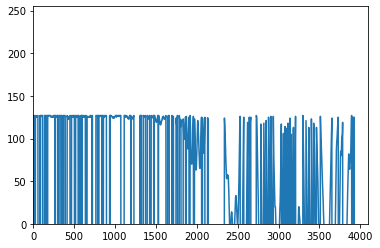

In [3]:
p = pyaudio.PyAudio()

stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)
fig, ax = plt.subplots()

x= np.arange(0, 2 * CHUNK, 2)
line, = ax.plot(x, np.random.rand(CHUNK))
ax.set_ylim(0,255)
ax.set_xlim(0, CHUNK)

while True:
    data = stream.read(CHUNK)
    data_int = np.array(struct.unpack(str(2*CHUNK)+ 'B', data), dtype='b' )[::2] + 127
    line.set_ydata(data_int)
    fig.canvas.draw()
    fig.canvas.flush_events()
# Close and terminate the stream
stream.close()
p.terminate()